In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [13]:
# Getting original dataset
fields=['target','ids','date','query','user','text']
df = pd.read_csv("tweetsentimentdata.csv", encoding="ISO-8859-1", names = fields)

# Removing unnecessary columns
df = df[['target', 'text']]

In [14]:
# Splitting the data. 90% training data, 10% test data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.1, random_state = 0)

In [15]:
# Vectorize the data. 

t = time.time()

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 77 seconds


In [16]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Time Taken: 1 seconds
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     79738
           4       0.80      0.81      0.80     80262

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



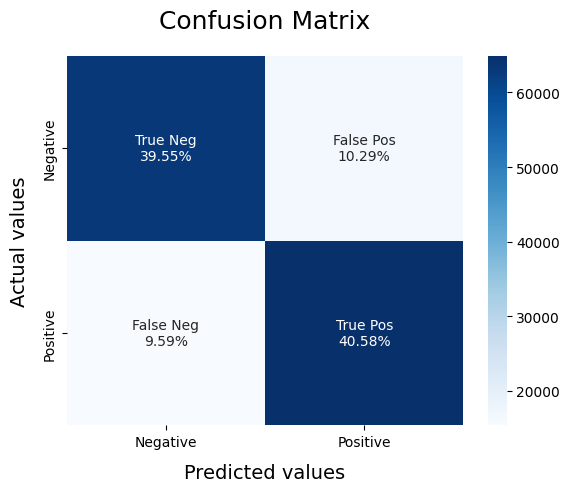

In [17]:
#running Bernoulli model on original data

import time
t = time.time()
bernModel = BernoulliNB(alpha = 2.0, force_alpha = True)
bernModel.fit(X_train, y_train)
print(f'Time Taken: {round(time.time()-t)} seconds')
model_Evaluate(bernModel)